## **IMPORTAMOS LAS LIBRERÍAS :**

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Preprocessing 
from sklearn.preprocessing import StandardScaler
#Otros 
from scipy.stats import norm
from scipy import stats
import warnings #nos sirve para ignorar los warnings que puedan aparecer. Se utiliza aca solo con fines esteticos
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from IPython.display import Image
from pandas import DataFrame, read_excel, merge

In [2]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error


In [3]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## **READ CSV:** 

**Read_CSV:** Descargamos de https://data.buenosaires.gob.ar/dataset/mapa-oportunidades-comerciales-moc, el dataset de RUBROS COMERCIALES del año 2017. Luego con el comando de Pandas "pd.read_csv" indicamos donde se ubica el dataset a ser leido. Una vez leido guardamos la tabla como un DataFrame de Pandas en el elemento "ZONAS"; "RUBROS".

In [55]:
pwd 

'/Users/toto/Documents/UTN 2019/Ciencia de Datos/TP DE LA MATERIA'

In [56]:
Zonas = pd.read_csv('zonas.csv', delimiter=';')
Rubros = pd.read_csv('rubros.csv', delimiter=';')

## **EDA:**  (ANÁLISIS EXPLORATORIO DE DATOS) 

In [57]:
Zonas.head()

,MOC_ZONAS_ID,PK_TIEMPO_ID,POBLACION_FLOTANTE,POBLACION_VIVIENTE,POBLACION_TRABAJADORA,CANTIDAD_HOGARES,PRECIO_PROMEDIO_ALQUILER_LOCAL,PRECIO_MAX_ALQUILER_LOCAL,PRECIO_MIN_ALQUILER_LOCAL,SUPERFICIE_M2_PROMEDIO_ALQUILER,...,RUBRO_MENOS_PREDOMINANTE,PRECIO_PROMEDIO_VENTA_LOCAL,PRECIO_MAX_VENTA_LOCAL,PRECIO_MIN_VENTA_LOCAL,SUPERFICIE_M2_PROMEDIO_VENTA,SUPERFICIE_M2_MAX_VENTA,SUPERFICIE_M2_MIN_VENTA,NIVEL_LOCALES_RUBRO_PREDOMINANTE,NIVEL_LOCALES_RUBRO_MENOS_PREDOMINANTE,FECHA
0,1,591673,3,6726,3732,2465,58128.80,162999.60,26000.00,322.26,...,HELADERIAS,1144213.52,2800000.0,25000.0,4918.06,7857.1,2720.6,1,1,2017-07-01 00:00:00.000
1,2,591673,5,589,348,255,34854.58,47068.93,20401.40,167.54,...,VETERINARIA,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2017-07-01 00:00:00.000
2,3,591673,2,10764,5967,3622,10606.00,13311.99,7900.00,120.67,...,INSTITUCIONES DEPORTIVAS,273333.33,550000.0,60000.0,1662.77,2200.0,1166.7,1,1,2017-07-01 00:00:00.000
3,4,591673,2,6690,3927,2379,25500.53,150000.00,6436.93,154.71,...,VETERINARIA,286636.36,530000.0,90000.0,1416.98,2323.2,679.5,1,1,2017-07-01 00:00:00.000
4,5,591673,5,623,246,154,28014.00,28014.00,28014.00,304.50,...,INSTITUCIONES DEPORTIVAS,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2017-07-01 00:00:00.000


In [58]:
Rubros.head(5)

,MOC_RUBROS_ID,MOC_ZONAS_ID,RUBRO,NIVEL_RIESGO,FACTURACION_PROM_ACTUAL,INDICE_CRECIMIENTO,INDICE_ESTABILIDAD,INDICE_APERTURA,INDICE_CIERRE,INDICE_SUPERVIVENCIA,...,SUP_MENOS_1,SUP_ENTRE_1_Y_2,SUP_ENTRE_2_Y_3,SUP_ENTRE_3_Y_4,SUP_ENTRE_4_Y_5,SUP_MAS_5,FACTURACION_PROM_ANIO_ANT,NIVEL_LOCALES,INDICE_CIERRE_ANIO_ANT,INDICE_APERTURA_ANIO_ANT
0,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,10.00,45.00,15.00,0.00,30.00,2.0,1.0,16.67,16.67
1,2,2,INSUMOS PARA EL HOGAR,NaN,NaN,NaN,NaN,0.0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,INSUMOS PARA EL HOGAR,1.0,4.0,4.0,2.0,0.0,0.00,100.0,...,0.0,18.18,27.27,27.27,27.27,0.00,4.0,1.0,NaN,33.33
3,4,4,INSUMOS PARA EL HOGAR,1.0,2.0,4.0,4.0,0.0,0.00,100.0,...,0.0,0.00,0.00,14.29,0.00,85.71,3.0,1.0,NaN,NaN
4,5,5,INSUMOS PARA EL HOGAR,NaN,NaN,NaN,NaN,0.0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
Zonas.shape

(161, 25)

In [60]:
Rubros.shape

(2898, 22)

**LIMPIEZA DE LOS DATOS**

In [61]:
Zonas_nulls = Zonas.isnull().sum()
Zonas_nulls

MOC_ZONAS_ID                                 0
PK_TIEMPO_ID                                 0
POBLACION_FLOTANTE                           0
POBLACION_VIVIENTE                           0
POBLACION_TRABAJADORA                        0
CANTIDAD_HOGARES                             0
PRECIO_PROMEDIO_ALQUILER_LOCAL               7
PRECIO_MAX_ALQUILER_LOCAL                    7
PRECIO_MIN_ALQUILER_LOCAL                    7
SUPERFICIE_M2_PROMEDIO_ALQUILER              7
SUPERFICIE_M2_MAX_ALQUILER                   7
SUPERFICIE_M2_MIN_ALQUILER                   7
RUBRO_PREDOMINANTE                           0
FACTURACION_PROM_RUBRO_PREDOMINANTE          0
FACTURACION_PROM_RUBRO_MENOS_PREDOMINANTE    0
RUBRO_MENOS_PREDOMINANTE                     0
PRECIO_PROMEDIO_VENTA_LOCAL                  8
PRECIO_MAX_VENTA_LOCAL                       8
PRECIO_MIN_VENTA_LOCAL                       8
SUPERFICIE_M2_PROMEDIO_VENTA                 8
SUPERFICIE_M2_MAX_VENTA                      8
SUPERFICIE_M2

In [62]:
total_Zonas = Zonas.isnull().sum().sort_values(ascending=False)
percent_Zonas = (Zonas.isnull().sum()/Zonas.isnull().count()).sort_values(ascending=False)
missing_data_Zonas = np.round(pd.concat([total_Zonas, percent_Zonas], axis=1, keys=['Total', 'Percent']),2)
missing_data_Zonas.head(12)

,Total,Percent
SUPERFICIE_M2_MIN_VENTA,8,0.05
SUPERFICIE_M2_MAX_VENTA,8,0.05
SUPERFICIE_M2_PROMEDIO_VENTA,8,0.05
PRECIO_MIN_VENTA_LOCAL,8,0.05
PRECIO_MAX_VENTA_LOCAL,8,0.05
PRECIO_PROMEDIO_VENTA_LOCAL,8,0.05
PRECIO_MAX_ALQUILER_LOCAL,7,0.04
SUPERFICIE_M2_MIN_ALQUILER,7,0.04
PRECIO_MIN_ALQUILER_LOCAL,7,0.04
PRECIO_PROMEDIO_ALQUILER_LOCAL,7,0.04


In [63]:
Rubros_nulls = Rubros.isnull().any()
Rubros_nulls

MOC_RUBROS_ID                    False
MOC_ZONAS_ID                     False
RUBRO                            False
NIVEL_RIESGO                      True
FACTURACION_PROM_ACTUAL           True
INDICE_CRECIMIENTO                True
INDICE_ESTABILIDAD                True
INDICE_APERTURA                  False
INDICE_CIERRE                    False
INDICE_SUPERVIVENCIA              True
IND_AP_ACT_VS_IND_AP_ANIO_ANT     True
IND_CL_ACT_VS_IND_CL_ANIO_ANT     True
SUP_MENOS_1                       True
SUP_ENTRE_1_Y_2                   True
SUP_ENTRE_2_Y_3                   True
SUP_ENTRE_3_Y_4                   True
SUP_ENTRE_4_Y_5                   True
SUP_MAS_5                         True
FACTURACION_PROM_ANIO_ANT         True
NIVEL_LOCALES                     True
INDICE_CIERRE_ANIO_ANT            True
INDICE_APERTURA_ANIO_ANT          True
dtype: bool

In [64]:
total_Rubro = Rubros.isnull().sum().sort_values(ascending=False)
percent_Rubro = (Rubros.isnull().sum()/Rubros.isnull().count()).sort_values(ascending=False)
missing_data_Rubro = np.round(pd.concat([total_Rubro, percent_Rubro], axis=1, keys=['Total', 'Percent']),2)
missing_data_Rubro.head(17)

,Total,Percent
INDICE_CIERRE_ANIO_ANT,1510,0.52
IND_CL_ACT_VS_IND_CL_ANIO_ANT,1502,0.52
INDICE_APERTURA_ANIO_ANT,832,0.29
IND_AP_ACT_VS_IND_AP_ANIO_ANT,831,0.29
INDICE_SUPERVIVENCIA,360,0.12
INDICE_CRECIMIENTO,186,0.06
FACTURACION_PROM_ACTUAL,170,0.06
NIVEL_LOCALES,155,0.05
FACTURACION_PROM_ANIO_ANT,154,0.05
INDICE_ESTABILIDAD,149,0.05


In [65]:
Zonas.columns

Index(['MOC_ZONAS_ID', 'PK_TIEMPO_ID', 'POBLACION_FLOTANTE',
       'POBLACION_VIVIENTE', 'POBLACION_TRABAJADORA', 'CANTIDAD_HOGARES',
       'PRECIO_PROMEDIO_ALQUILER_LOCAL', 'PRECIO_MAX_ALQUILER_LOCAL',
       'PRECIO_MIN_ALQUILER_LOCAL', 'SUPERFICIE_M2_PROMEDIO_ALQUILER',
       'SUPERFICIE_M2_MAX_ALQUILER', 'SUPERFICIE_M2_MIN_ALQUILER',
       'RUBRO_PREDOMINANTE', 'FACTURACION_PROM_RUBRO_PREDOMINANTE',
       'FACTURACION_PROM_RUBRO_MENOS_PREDOMINANTE', 'RUBRO_MENOS_PREDOMINANTE',
       'PRECIO_PROMEDIO_VENTA_LOCAL', 'PRECIO_MAX_VENTA_LOCAL',
       'PRECIO_MIN_VENTA_LOCAL', 'SUPERFICIE_M2_PROMEDIO_VENTA',
       'SUPERFICIE_M2_MAX_VENTA', 'SUPERFICIE_M2_MIN_VENTA',
       'NIVEL_LOCALES_RUBRO_PREDOMINANTE',
       'NIVEL_LOCALES_RUBRO_MENOS_PREDOMINANTE', 'FECHA'],
      dtype='object')

In [66]:
Rubros.columns

Index(['MOC_RUBROS_ID', 'MOC_ZONAS_ID', 'RUBRO', 'NIVEL_RIESGO',
       'FACTURACION_PROM_ACTUAL', 'INDICE_CRECIMIENTO', 'INDICE_ESTABILIDAD',
       'INDICE_APERTURA', 'INDICE_CIERRE', 'INDICE_SUPERVIVENCIA',
       'IND_AP_ACT_VS_IND_AP_ANIO_ANT', 'IND_CL_ACT_VS_IND_CL_ANIO_ANT',
       'SUP_MENOS_1', 'SUP_ENTRE_1_Y_2', 'SUP_ENTRE_2_Y_3', 'SUP_ENTRE_3_Y_4',
       'SUP_ENTRE_4_Y_5', 'SUP_MAS_5', 'FACTURACION_PROM_ANIO_ANT',
       'NIVEL_LOCALES', 'INDICE_CIERRE_ANIO_ANT', 'INDICE_APERTURA_ANIO_ANT'],
      dtype='object')

In [67]:
Zonas.describe()

,MOC_ZONAS_ID,PK_TIEMPO_ID,POBLACION_FLOTANTE,POBLACION_VIVIENTE,POBLACION_TRABAJADORA,CANTIDAD_HOGARES,PRECIO_PROMEDIO_ALQUILER_LOCAL,PRECIO_MAX_ALQUILER_LOCAL,PRECIO_MIN_ALQUILER_LOCAL,SUPERFICIE_M2_PROMEDIO_ALQUILER,...,FACTURACION_PROM_RUBRO_PREDOMINANTE,FACTURACION_PROM_RUBRO_MENOS_PREDOMINANTE,PRECIO_PROMEDIO_VENTA_LOCAL,PRECIO_MAX_VENTA_LOCAL,PRECIO_MIN_VENTA_LOCAL,SUPERFICIE_M2_PROMEDIO_VENTA,SUPERFICIE_M2_MAX_VENTA,SUPERFICIE_M2_MIN_VENTA,NIVEL_LOCALES_RUBRO_PREDOMINANTE,NIVEL_LOCALES_RUBRO_MENOS_PREDOMINANTE
count,161.000000,161.0,161.000000,161.000000,161.000000,161.000000,154.000000,1.540000e+02,154.000000,154.000000,...,161.000000,161.00000,1.530000e+02,1.530000e+02,153.000000,153.000000,153.000000,153.000000,161.000000,161.000000
mean,81.000000,591673.0,2.347826,17951.248447,10273.881988,7143.689441,27001.372922,1.304347e+05,4757.462468,245.980714,...,4.422360,2.21118,3.420876e+05,1.390293e+06,65788.882353,2508.841830,8489.986144,1022.924118,2.049689,1.583851
std,46.620811,0.0,0.976351,8673.621310,5105.533507,3830.758489,16008.828191,1.775241e+05,4675.978131,112.695552,...,1.034648,1.56289,2.085541e+05,1.591449e+06,69898.529025,1281.047189,13616.545958,618.141516,1.192693,1.170251
min,1.000000,591673.0,1.000000,74.000000,72.000000,45.000000,4122.190000,7.700000e+03,1100.000000,78.700000,...,1.000000,1.00000,4.750000e+04,5.700000e+04,11900.000000,965.800000,1000.000000,306.500000,1.000000,1.000000
25%,41.000000,591673.0,2.000000,10823.000000,6029.000000,3950.000000,15237.562500,4.050000e+04,3000.000000,168.025000,...,4.000000,1.00000,1.894412e+05,4.500000e+05,35000.000000,1639.250000,2812.500000,684.210000,1.000000,1.000000
50%,81.000000,591673.0,2.000000,16675.000000,9663.000000,6700.000000,23372.080000,7.624799e+04,3800.000000,212.340000,...,5.000000,1.00000,2.965882e+05,9.350000e+05,49800.000000,2190.240000,4450.000000,875.000000,2.000000,1.000000
75%,121.000000,591673.0,3.000000,24138.000000,13997.000000,9708.000000,35336.687500,1.484542e+05,4725.000000,299.990000,...,5.000000,3.00000,4.209677e+05,1.800000e+06,70000.000000,3022.220000,8000.000000,1209.700000,3.000000,2.000000
max,161.000000,591673.0,5.000000,42529.000000,25740.000000,19810.000000,93839.290000,1.412690e+06,40000.000000,708.350000,...,5.000000,5.00000,1.144214e+06,1.200000e+07,700000.000000,9062.250000,125000.000000,5833.300000,5.000000,5.000000


In [68]:
Rubros.describe()

,MOC_RUBROS_ID,MOC_ZONAS_ID,NIVEL_RIESGO,FACTURACION_PROM_ACTUAL,INDICE_CRECIMIENTO,INDICE_ESTABILIDAD,INDICE_APERTURA,INDICE_CIERRE,INDICE_SUPERVIVENCIA,IND_AP_ACT_VS_IND_AP_ANIO_ANT,...,SUP_MENOS_1,SUP_ENTRE_1_Y_2,SUP_ENTRE_2_Y_3,SUP_ENTRE_3_Y_4,SUP_ENTRE_4_Y_5,SUP_MAS_5,FACTURACION_PROM_ANIO_ANT,NIVEL_LOCALES,INDICE_CIERRE_ANIO_ANT,INDICE_APERTURA_ANIO_ANT
count,2898.000000,2898.000000,2749.000000,2728.000000,2712.000000,2749.000000,2898.000000,2898.000000,2538.000000,2067.000000,...,2785.000000,2785.000000,2785.000000,2785.000000,2785.00000,2785.000000,2744.000000,2743.000000,1388.000000,2066.000000
mean,1449.500000,81.000000,1.779920,3.523460,3.362463,3.242270,4.424896,2.440901,85.994878,-72.811572,...,3.209436,11.852560,12.950671,11.553896,7.73265,52.700664,3.495262,1.813708,12.922370,21.772386
std,836.724865,46.483821,1.043426,1.561888,0.977561,0.986932,9.507299,6.971838,26.890169,44.634215,...,7.292053,15.058441,14.047338,13.700888,11.11506,22.736519,1.566829,1.223673,14.200312,18.096290
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-100.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.030000,2.130000
25%,725.250000,41.000000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,80.000000,-100.000000,...,0.000000,2.500000,0.000000,0.000000,0.00000,41.430000,2.000000,1.000000,5.260000,11.110000
50%,1449.500000,81.000000,1.000000,4.000000,4.000000,4.000000,0.000000,0.000000,100.000000,-100.000000,...,0.880000,8.910000,10.530000,8.820000,5.45000,55.560000,4.000000,1.000000,8.720000,16.670000
75%,2173.750000,121.000000,2.000000,5.000000,4.000000,4.000000,5.560000,2.440000,100.000000,-60.000000,...,3.850000,15.100000,17.780000,15.790000,10.89000,66.670000,5.000000,2.000000,15.000000,25.000000
max,2898.000000,161.000000,5.000000,5.000000,5.000000,5.000000,100.000000,100.000000,100.000000,300.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,5.000000,5.000000,150.000000,200.000000


In [69]:
Rubros_1 = Rubros.drop(['INDICE_CIERRE_ANIO_ANT', 'IND_CL_ACT_VS_IND_CL_ANIO_ANT','INDICE_APERTURA_ANIO_ANT','FACTURACION_PROM_ANIO_ANT','IND_AP_ACT_VS_IND_AP_ANIO_ANT'], axis=1)
Rubros_1 = Rubros_1.dropna(subset = ["FACTURACION_PROM_ACTUAL"])

In [70]:
total_Rubros_1 = Rubros_1.isnull().sum().sort_values(ascending=False)
percent_Rubros_1 = (Rubros_1.isnull().sum()/Rubros_1.isnull().count()).sort_values(ascending=False)
missing_data_Rubros_1 = np.round(pd.concat([total_Rubros_1, percent_Rubros_1], axis=1, keys=['Total', 'Percent']),2)
missing_data_Rubros_1.head(5)

,Total,Percent
INDICE_SUPERVIVENCIA,216,0.08
INDICE_CRECIMIENTO,16,0.01
NIVEL_LOCALES,5,0.00
NIVEL_RIESGO,1,0.00
INDICE_ESTABILIDAD,1,0.00


In [71]:
Rubros_1.shape

(2728, 17)

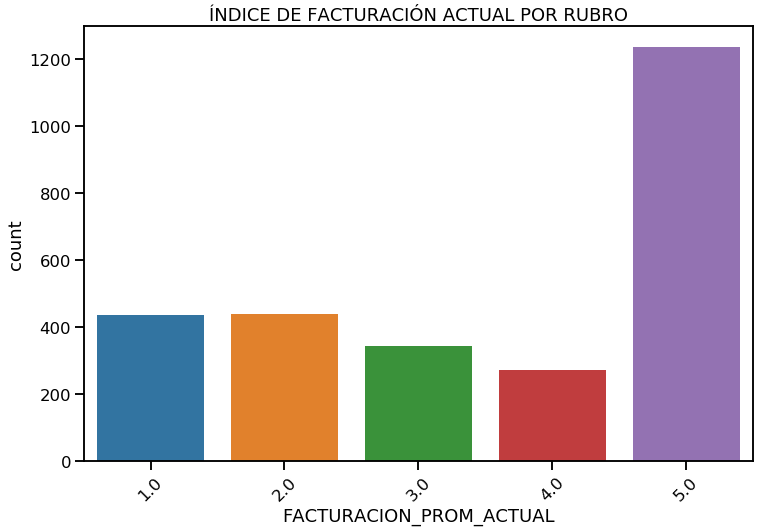

In [72]:
plt.figure(figsize=(12, 8)) #Ejemplo
sns.set_context("talk")
az = sns.countplot(x="FACTURACION_PROM_ACTUAL", data=Rubros_1)
plt.xticks(rotation=45)
plt.title("ÍNDICE DE FACTURACIÓN ACTUAL POR RUBRO")
plt.show()

In [73]:
print("Variables mas importantes con respecto a nuestro objetivo")
corr = Rubros_1.corr()
corr.sort_values(["FACTURACION_PROM_ACTUAL"], ascending = False, inplace = True)
print(corr.FACTURACION_PROM_ACTUAL)

Variables mas importantes con respecto a nuestro objetivo
FACTURACION_PROM_ACTUAL    1.000000
NIVEL_LOCALES              0.391911
INDICE_ESTABILIDAD         0.329109
SUP_MAS_5                  0.297745
INDICE_SUPERVIVENCIA       0.065792
MOC_ZONAS_ID               0.039722
MOC_RUBROS_ID              0.034348
NIVEL_RIESGO              -0.001666
SUP_ENTRE_4_Y_5           -0.020039
INDICE_CIERRE             -0.083037
SUP_ENTRE_2_Y_3           -0.101122
SUP_ENTRE_3_Y_4           -0.104229
SUP_MENOS_1               -0.125193
INDICE_CRECIMIENTO        -0.134525
INDICE_APERTURA           -0.161961
SUP_ENTRE_1_Y_2           -0.197736
Name: FACTURACION_PROM_ACTUAL, dtype: float64


Con la función de Seaborn *sns.heatmap* les queda un buen mapa de correlación

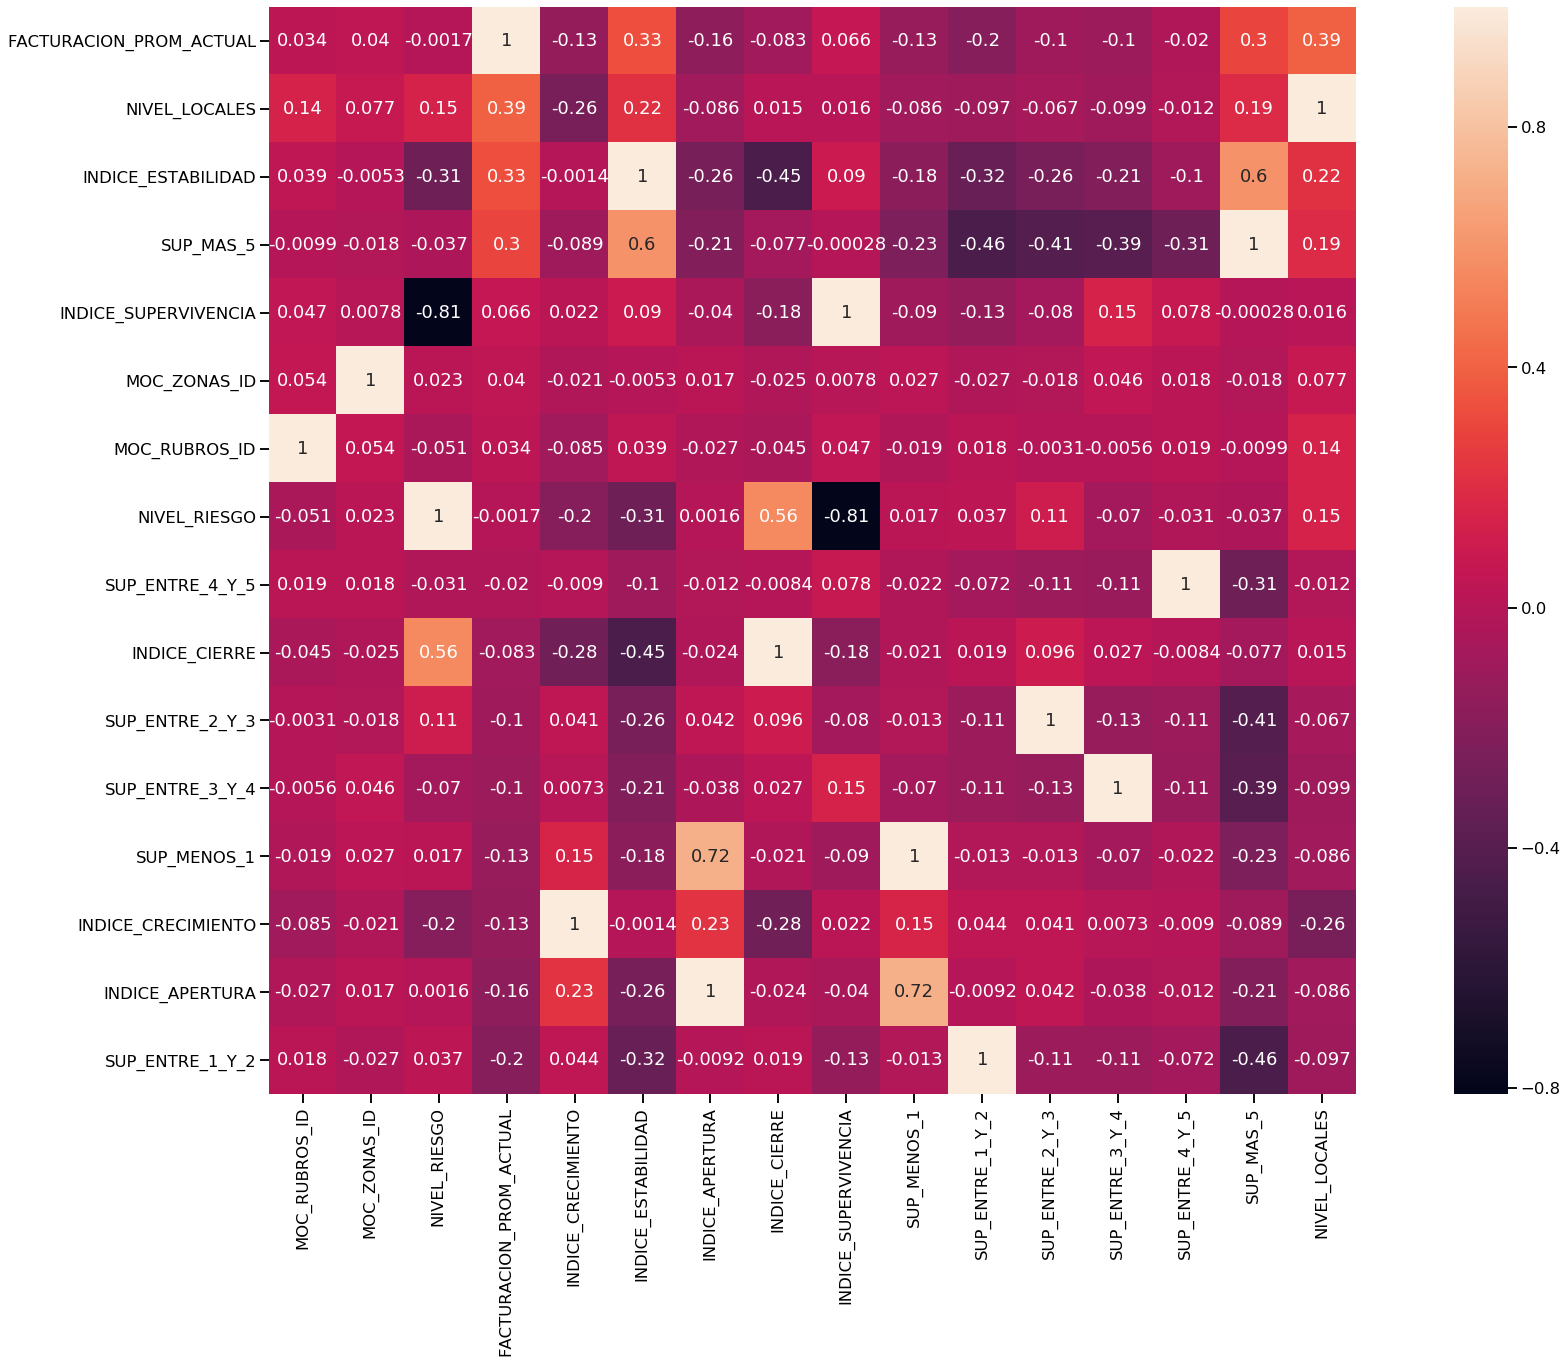

In [74]:
#Pueden cambiar los colores y mas cosas utilizando los parámetros
plt.figure(figsize=(35, 20))
hm = sns.heatmap(corr, cbar = True,square= True, annot = True)
plt.show()

In [75]:
print("Variables mas importantes con respecto a nuestro objetivo")
corr.sort_values(["INDICE_ESTABILIDAD"], ascending = False, inplace = True)
print(corr.INDICE_ESTABILIDAD)

Variables mas importantes con respecto a nuestro objetivo
INDICE_ESTABILIDAD         1.000000
SUP_MAS_5                  0.595066
FACTURACION_PROM_ACTUAL    0.329109
NIVEL_LOCALES              0.220400
INDICE_SUPERVIVENCIA       0.089558
MOC_RUBROS_ID              0.039101
INDICE_CRECIMIENTO        -0.001369
MOC_ZONAS_ID              -0.005287
SUP_ENTRE_4_Y_5           -0.102941
SUP_MENOS_1               -0.179524
SUP_ENTRE_3_Y_4           -0.214088
SUP_ENTRE_2_Y_3           -0.256759
INDICE_APERTURA           -0.262896
NIVEL_RIESGO              -0.305893
SUP_ENTRE_1_Y_2           -0.323413
INDICE_CIERRE             -0.454641
Name: INDICE_ESTABILIDAD, dtype: float64


In [76]:
print("Variables mas importantes con respecto a nuestro objetivo")
corr = Rubros_1.corr()
corr.sort_values(["NIVEL_RIESGO"], ascending = False, inplace = True)
print(corr.NIVEL_RIESGO)

Variables mas importantes con respecto a nuestro objetivo
NIVEL_RIESGO               1.000000
INDICE_CIERRE              0.557793
NIVEL_LOCALES              0.145022
SUP_ENTRE_2_Y_3            0.108779
SUP_ENTRE_1_Y_2            0.037286
MOC_ZONAS_ID               0.023241
SUP_MENOS_1                0.017254
INDICE_APERTURA            0.001577
FACTURACION_PROM_ACTUAL   -0.001666
SUP_ENTRE_4_Y_5           -0.031189
SUP_MAS_5                 -0.036599
MOC_RUBROS_ID             -0.050725
SUP_ENTRE_3_Y_4           -0.069623
INDICE_CRECIMIENTO        -0.197379
INDICE_ESTABILIDAD        -0.305893
INDICE_SUPERVIVENCIA      -0.810293
Name: NIVEL_RIESGO, dtype: float64


In [77]:
np.max(Rubros_1)

MOC_RUBROS_ID                     2897
MOC_ZONAS_ID                       161
RUBRO                      VETERINARIA
NIVEL_RIESGO                         5
FACTURACION_PROM_ACTUAL              5
INDICE_CRECIMIENTO                   5
INDICE_ESTABILIDAD                   5
INDICE_APERTURA                    100
INDICE_CIERRE                      100
INDICE_SUPERVIVENCIA               100
SUP_MENOS_1                        100
SUP_ENTRE_1_Y_2                    100
SUP_ENTRE_2_Y_3                    100
SUP_ENTRE_3_Y_4                    100
SUP_ENTRE_4_Y_5                    100
SUP_MAS_5                          100
NIVEL_LOCALES                        5
dtype: object

In [78]:
Rubros_1.fillna(Rubros_1.mean(), inplace=True)
Rubros_1.shape

(2728, 17)

In [79]:
total_Rubros_1 = Rubros_1.isnull().sum().sort_values(ascending=False)
percent_Rubros_1 = (Rubros_1.isnull().sum()/Rubros_1.isnull().count()).sort_values(ascending=False)
missing_data_Rubros_1 = np.round(pd.concat([total_Rubros_1, percent_Rubros_1], axis=1, keys=['Total', 'Percent']),2)
missing_data_Rubros_1.head(5)

,Total,Percent
NIVEL_LOCALES,0,0.0
INDICE_APERTURA,0,0.0
MOC_ZONAS_ID,0,0.0
RUBRO,0,0.0
NIVEL_RIESGO,0,0.0


## **DUMMIES :**

**DUMIES RUBRO**

In [80]:
Rubros_1_dummies = pd.get_dummies (Rubros_1['RUBRO'])

In [81]:
Rubros_1_dummies.head()

,BARES Y CAFES,CARNES Y VERDURAS,COMIDA AL PASO,FERRETERIA Y CONSTRUCCION,FIAMBRERIAS Y DIETETICAS,HELADERIAS,INDUMENTARIA,INSTITUCIONES DEPORTIVAS,INSUMOS PARA EL HOGAR,KIOSCOS Y LOTERIAS,MUSICA Y LIBRERIA,OPTICA Y JOYERIAS,PANADERIAS,RESTAURANTES,SALUD Y COSMETICA,SUPERMERCADOS Y ALMACENES,TRATAMIENTOS ESTETICOS,VETERINARIA
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [82]:
Rubros_1_dummies.shape

(2728, 18)

**DUMMIES ZONAS**

In [83]:
Rubros_1_dummies2 = pd.get_dummies (Rubros_1['MOC_ZONAS_ID'])

In [84]:
Rubros_1_dummies2.head()

,1,2,3,4,5,6,7,8,9,10,...,152,153,154,155,156,157,158,159,160,161
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
Rubros_1_dummies2.shape

(2728, 161)

CONCATENO

In [86]:
Rubros_new = pd.concat ([Rubros_1,Rubros_1_dummies2,Rubros_1_dummies], axis=1)

In [87]:
Rubros_new.head()

,MOC_RUBROS_ID,MOC_ZONAS_ID,RUBRO,NIVEL_RIESGO,FACTURACION_PROM_ACTUAL,INDICE_CRECIMIENTO,INDICE_ESTABILIDAD,INDICE_APERTURA,INDICE_CIERRE,INDICE_SUPERVIVENCIA,...,INSUMOS PARA EL HOGAR,KIOSCOS Y LOTERIAS,MUSICA Y LIBRERIA,OPTICA Y JOYERIAS,PANADERIAS,RESTAURANTES,SALUD Y COSMETICA,SUPERMERCADOS Y ALMACENES,TRATAMIENTOS ESTETICOS,VETERINARIA
0,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.000000,...,1,0,0,0,0,0,0,0,0,0
2,3,3,INSUMOS PARA EL HOGAR,1.0,4.0,4.0,2.0,0.0,0.00,100.000000,...,1,0,0,0,0,0,0,0,0,0
3,4,4,INSUMOS PARA EL HOGAR,1.0,2.0,4.0,4.0,0.0,0.00,100.000000,...,1,0,0,0,0,0,0,0,0,0
5,6,6,INSUMOS PARA EL HOGAR,4.0,5.0,4.0,5.0,0.0,0.00,0.000000,...,1,0,0,0,0,0,0,0,0,0
6,7,7,INSUMOS PARA EL HOGAR,1.0,5.0,4.0,5.0,0.0,0.00,86.168392,...,1,0,0,0,0,0,0,0,0,0


In [88]:
Rubros_new1 =Rubros_new.drop(['MOC_RUBROS_ID', 'MOC_ZONAS_ID','RUBRO'], axis=1)

In [149]:
Rubros_new1.head()

,NIVEL_RIESGO,FACTURACION_PROM_ACTUAL,INDICE_CRECIMIENTO,INDICE_ESTABILIDAD,INDICE_APERTURA,INDICE_CIERRE,INDICE_SUPERVIVENCIA,SUP_MENOS_1,SUP_ENTRE_1_Y_2,SUP_ENTRE_2_Y_3,...,INSUMOS PARA EL HOGAR,KIOSCOS Y LOTERIAS,MUSICA Y LIBRERIA,OPTICA Y JOYERIAS,PANADERIAS,RESTAURANTES,SALUD Y COSMETICA,SUPERMERCADOS Y ALMACENES,TRATAMIENTOS ESTETICOS,VETERINARIA
0,5.0,1.0,3.0,1.0,0.0,16.67,0.000000,0.0,10.00,45.00,...,1,0,0,0,0,0,0,0,0,0
2,1.0,4.0,4.0,2.0,0.0,0.00,100.000000,0.0,18.18,27.27,...,1,0,0,0,0,0,0,0,0,0
3,1.0,2.0,4.0,4.0,0.0,0.00,100.000000,0.0,0.00,0.00,...,1,0,0,0,0,0,0,0,0,0
5,4.0,5.0,4.0,5.0,0.0,0.00,0.000000,0.0,18.18,0.00,...,1,0,0,0,0,0,0,0,0,0
6,1.0,5.0,4.0,5.0,0.0,0.00,86.168392,0.0,11.11,0.00,...,1,0,0,0,0,0,0,0,0,0


## **PREPROCESSING: AUTOSCALING (RUBROS) :**

In [150]:
# Step 4: auto scaling train- set (mean = 0, std = 1)
scaler = preprocessing.StandardScaler().fit(Rubros_new1)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [151]:
x_scal = scaler.transform(Rubros_new1)  

In [152]:
print (x_scal.mean(axis=0))
print (x_scal.std(axis=0))

#Se verifica que el x train tenga media = 0 y desvío igual a 1

[ 1.97951789e-16 -2.08370304e-17 -5.20925759e-18 -6.35529426e-16
 -4.42786895e-17  6.77203487e-17  2.34416592e-16  2.34416592e-17
 -5.20925759e-18 -2.60462880e-17  8.59527503e-17 -8.33481215e-17
  7.29296063e-17  2.08370304e-17 -1.43254584e-17 -1.30231440e-17
  1.56277728e-17 -9.76735799e-18  1.30231440e-18 -2.60462880e-18
 -1.17208296e-17  2.60462880e-18 -1.69300872e-17 -7.81388639e-18
  2.57207094e-17 -2.14881876e-17  1.82324016e-17  2.63718666e-17
  2.60462880e-17 -1.49766156e-17 -1.43254584e-17 -2.08370304e-17
 -1.56277728e-17 -1.69300872e-17 -1.69300872e-17 -2.14881876e-17
 -2.14881876e-17 -2.14881876e-17 -7.81388639e-18 -1.69300872e-17
 -1.69300872e-17 -1.69300872e-17 -6.51157199e-18 -1.75812444e-17
 -1.75812444e-17 -1.88835588e-17 -1.75812444e-17 -1.75812444e-17
 -1.88835588e-17 -2.01858732e-17  1.30231440e-17 -2.40928164e-17
 -1.82324016e-17 -1.95347160e-17 -1.88835588e-17 -9.76735799e-18
 -1.95347160e-17 -9.76735799e-18 -2.05114518e-17 -1.82324016e-17
 -1.82324016e-17 -7.81388

## **CLUSTERING (SIN PCA) :**

In [153]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [154]:
kmeans = KMeans(n_clusters=5, random_state=6).fit(x_scal)

In [155]:
kmeans.labels_

array([2, 3, 1, ..., 3, 1, 2], dtype=int32)

In [156]:
kmeans.cluster_centers_

array([[ 2.53860230e-01,  6.37785637e-01, -5.77595056e-01,
         4.65679830e-01, -2.15625457e-01,  7.90911664e-03,
        -2.17760758e-03, -1.65267779e-01, -1.90040563e-01,
        -1.18088909e-01, -1.91653128e-01, -2.26784042e-02,
         3.70640558e-01,  1.49962107e+00, -5.72214315e-03,
        -6.06562104e-02, -4.67023599e-02, -2.72152396e-02,
        -3.31800758e-02,  1.40371298e-02, -1.22882951e-03,
        -1.91494997e-02, -5.62399635e-02,  3.53418116e-03,
         8.60653432e-03, -5.32016496e-02,  8.60653432e-03,
        -3.13588196e-02, -1.90479128e-02, -5.72214315e-03,
        -3.09810533e-02, -5.32016496e-02,  1.95367671e-02,
        -5.72214315e-03, -5.72214315e-03,  2.47575806e-02,
        -1.22882951e-03, -1.22882951e-03,  3.53418116e-03,
        -5.72214315e-03, -5.72214315e-03,  1.95367671e-02,
        -2.32470583e-02,  1.95367671e-02, -5.72214315e-03,
        -2.72152396e-02,  1.95367671e-02,  1.95367671e-02,
        -5.72214315e-03, -1.22882951e-03, -9.80752308e-0

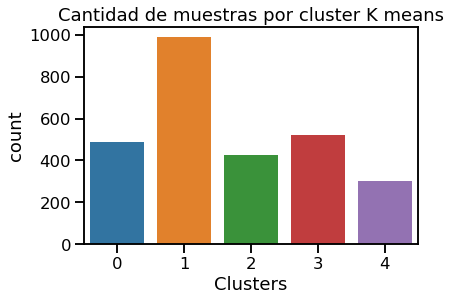

In [157]:
sns.countplot(kmeans.labels_)
plt.title("Cantidad de muestras por cluster K means")
plt.xlabel("Clusters")
plt.show()

CLUSTERING JERÁRQUICO 

In [158]:
hierclus = AgglomerativeClustering(n_clusters=5).fit(x_scal)

In [159]:
hierclus.labels_

array([1, 1, 1, ..., 4, 4, 4])

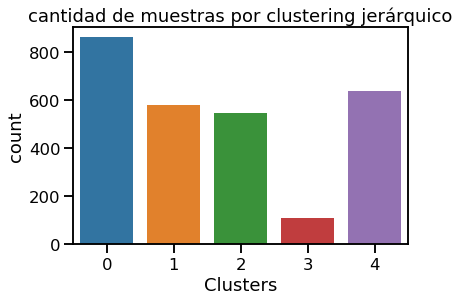

In [160]:
sns.countplot(hierclus.labels_)
plt.title("cantidad de muestras por clustering jerárquico")
plt.xlabel("Clusters")
plt.show()

In [161]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [162]:
for k in range (2,11):
    kmeans = KMeans(n_clusters=k, random_state=6).fit(x_scal)
    kmeans.labels_
    metrics.silhouette_score(x_scal, kmeans.labels_, metric='euclidean')
    print(np.round(metrics.silhouette_score(x_scal, kmeans.labels_, metric='euclidean'),2))

0.02
0.01
0.0
0.0
0.01
0.01
0.01
0.02
0.02


In [163]:
for k in range (2,11):
    kmeans = KMeans(n_clusters=k, random_state=6).fit(x_scal)
    kmeans.labels_
    metrics.silhouette_score(x_scal, kmeans.labels_, metric='euclidean')
    print((metrics.silhouette_score(x_scal, kmeans.labels_, metric='euclidean'),2))

(0.016960650348608792, 2)
(0.013203267303988714, 2)
(0.004184253623764708, 2)
(0.004399171809040115, 2)
(0.009254724516921727, 2)
(0.010509091769644032, 2)
(0.012804767105138943, 2)
(0.016197921468398078, 2)
(0.01900504058142222, 2)


In [164]:
metrics.silhouette_score(x_scal, hierclus.labels_, metric='euclidean')

0.0034791580336130234

## **CLUSTERING (CON PCA) :**

In [165]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm
n_comps = 5
components = range(1,n_comps + 1)
pca = PCA(n_components= n_comps)
xpca = pd.DataFrame(pca.fit_transform(x_scal))
eigenvalues = pca.explained_variance_ratio_

<function matplotlib.pyplot.show(*args, **kw)>

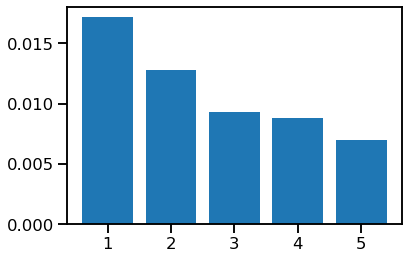

In [166]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.show

In [167]:
np.sum(eigenvalues[:10])

0.054981270522884304

In [168]:
for k in range (2,11):
    kmenem = AgglomerativeClustering(n_clusters=5).fit(xpca)
    kmenem.labels_
    metrics.silhouette_score(xpca, kmenem.labels_, metric='euclidean')
    print(np.round(metrics.silhouette_score(xpca, kmenem.labels_, metric='euclidean'),2))

0.19
0.19
0.19
0.19
0.19
0.19
0.19
0.19
0.19


In [169]:
for k in range (2,11):
    kmeans = KMeans(n_clusters=k, random_state=6).fit(xpca)
    kmeans.labels_
    metrics.silhouette_score(xpca, kmeans.labels_, metric='euclidean')
    print((metrics.silhouette_score(xpca, kmeans.labels_, metric='euclidean'),2))

(0.24778675588378762, 2)
(0.2435096903796904, 2)
(0.23109159752450092, 2)
(0.24201455905560962, 2)
(0.22600371292258506, 2)
(0.23177205516777172, 2)
(0.23470519541200033, 2)
(0.19992954989925843, 2)
(0.20526494953946578, 2)


In [170]:
for k in range (2,11):
    kmeans = KMeans(n_clusters=k, random_state=6).fit(xpca)
    kmeans.labels_
    metrics.silhouette_score(xpca, kmeans.labels_, metric='euclidean')
    print(np.round(metrics.silhouette_score(xpca, kmeans.labels_, metric='euclidean'),2))

0.25
0.24
0.23
0.24
0.23
0.23
0.23
0.2
0.21


In [171]:
kmeans2 = KMeans(n_clusters=2, random_state=6).fit(xpca)
kmeans2.labels_
metrics.silhouette_score(xpca, kmeans2.labels_, metric='euclidean')

0.24778675588378762

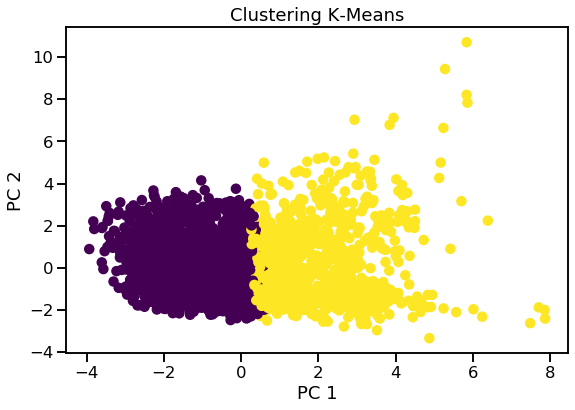

In [172]:
plt.figure(figsize=(9,6))
plt.scatter(xpca.iloc[:,0],xpca.iloc[:,1],c=kmeans2.labels_.astype(float))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering K-Means')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

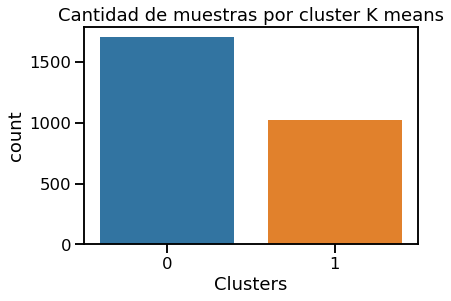

In [173]:
sns.countplot (kmeans2.labels_)
plt.title ("Cantidad de muestras por cluster K means")
plt.xlabel ("Clusters")
plt.show

## **CLASIFICADORES :**

In [174]:
Rubros_cla = pd.concat ([Rubros_1,Rubros_1_dummies], axis=1)

In [175]:
Rubros_cla1 =Rubros_cla.drop(['MOC_RUBROS_ID','RUBRO'], axis=1)
Rubros_cla1.head()

,MOC_ZONAS_ID,NIVEL_RIESGO,FACTURACION_PROM_ACTUAL,INDICE_CRECIMIENTO,INDICE_ESTABILIDAD,INDICE_APERTURA,INDICE_CIERRE,INDICE_SUPERVIVENCIA,SUP_MENOS_1,SUP_ENTRE_1_Y_2,...,INSUMOS PARA EL HOGAR,KIOSCOS Y LOTERIAS,MUSICA Y LIBRERIA,OPTICA Y JOYERIAS,PANADERIAS,RESTAURANTES,SALUD Y COSMETICA,SUPERMERCADOS Y ALMACENES,TRATAMIENTOS ESTETICOS,VETERINARIA
0,1,5.0,1.0,3.0,1.0,0.0,16.67,0.000000,0.0,10.00,...,1,0,0,0,0,0,0,0,0,0
2,3,1.0,4.0,4.0,2.0,0.0,0.00,100.000000,0.0,18.18,...,1,0,0,0,0,0,0,0,0,0
3,4,1.0,2.0,4.0,4.0,0.0,0.00,100.000000,0.0,0.00,...,1,0,0,0,0,0,0,0,0,0
5,6,4.0,5.0,4.0,5.0,0.0,0.00,0.000000,0.0,18.18,...,1,0,0,0,0,0,0,0,0,0
6,7,1.0,5.0,4.0,5.0,0.0,0.00,86.168392,0.0,11.11,...,1,0,0,0,0,0,0,0,0,0


In [176]:
Rubros_cla1.shape

(2728, 33)

In [177]:
x = Rubros_cla1.iloc[:,1:33]
np.round(x.head(),2)

,NIVEL_RIESGO,FACTURACION_PROM_ACTUAL,INDICE_CRECIMIENTO,INDICE_ESTABILIDAD,INDICE_APERTURA,INDICE_CIERRE,INDICE_SUPERVIVENCIA,SUP_MENOS_1,SUP_ENTRE_1_Y_2,SUP_ENTRE_2_Y_3,...,INSUMOS PARA EL HOGAR,KIOSCOS Y LOTERIAS,MUSICA Y LIBRERIA,OPTICA Y JOYERIAS,PANADERIAS,RESTAURANTES,SALUD Y COSMETICA,SUPERMERCADOS Y ALMACENES,TRATAMIENTOS ESTETICOS,VETERINARIA
0,5.0,1.0,3.0,1.0,0.0,16.67,0.00,0.0,10.00,45.00,...,1,0,0,0,0,0,0,0,0,0
2,1.0,4.0,4.0,2.0,0.0,0.00,100.00,0.0,18.18,27.27,...,1,0,0,0,0,0,0,0,0,0
3,1.0,2.0,4.0,4.0,0.0,0.00,100.00,0.0,0.00,0.00,...,1,0,0,0,0,0,0,0,0,0
5,4.0,5.0,4.0,5.0,0.0,0.00,0.00,0.0,18.18,0.00,...,1,0,0,0,0,0,0,0,0,0
6,1.0,5.0,4.0,5.0,0.0,0.00,86.17,0.0,11.11,0.00,...,1,0,0,0,0,0,0,0,0,0


**SEPARAMOS FEATURES CON LAS QUE VAMOS A TRABAJAR**

In [178]:
y = Rubros_1.iloc[:,1]
y.tail()

2892    156
2893    157
2894    158
2895    159
2896    160
Name: MOC_ZONAS_ID, dtype: int64

In [179]:
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)
y

array([  0,   2,   3, ..., 157, 158, 159])

In [180]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.6, random_state=4)

**Pre procesamiento: Autoscaling¶**

In [181]:
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [182]:
xtrain_scal = scaler.transform(xtrain)  
xtest_scal = scaler.transform(xtest) 

In [183]:
print (xtrain_scal.mean(axis=0))
print (xtrain_scal.std(axis=0))

[-1.44094941e-16 -9.76914852e-17 -6.83840396e-17 -2.34459565e-16
  1.62819142e-17 -5.69866997e-17 -3.80996792e-16 -6.51276568e-18
 -7.97813796e-17 -6.18712740e-17  2.27946799e-17 -2.27946799e-17
  8.46659538e-17 -4.07047855e-17 -5.04739340e-17 -3.25638284e-18
 -4.55893598e-17 -4.88457426e-17 -8.62941453e-17 -7.16404225e-17
 -6.10571783e-17  3.33779241e-17  5.69866997e-17 -1.62819142e-17
  3.25638284e-17  8.62941453e-17 -1.62819142e-18  6.83840396e-17
  6.83840396e-17  6.51276568e-18 -3.90765941e-17 -2.76792541e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [184]:
print (xtest_scal.mean(axis=0))
print (xtest_scal.std(axis=0))

[-0.00967852  0.00993451  0.01302759  0.00796289  0.01413951 -0.0162997
  0.00406906  0.00638842  0.000564    0.06818461 -0.01391817  0.04102071
 -0.05288417  0.08806222 -0.03491699  0.00520221  0.00123381  0.04247932
 -0.04744609 -0.03580882  0.05806308  0.10551098 -0.02933895 -0.01169025
 -0.03292813  0.02136317 -0.08166949 -0.00142349  0.02828653  0.0104794
  0.02527764  0.01100212]
[0.9904938  1.0100677  1.00781183 0.97589115 1.04494823 1.07861177
 0.99825772 0.90819406 0.98868754 1.06940506 0.9719488  1.05628107
 0.98699608 1.09625982 0.93211841 1.00989571 1.00233577 1.08127128
 0.91047768 0.91623055 1.11028869 1.21734402 0.94442869 0.9779369
 0.93791672 1.04064706 0.84688717 0.9971885  1.05391596 1.01980883
 1.0508875  1.02206597]


In [185]:
xtrain_scal.shape

(1091, 32)

## **MODELOS DE CLASIFICACIÓN :**

**LOGISTIC REGRESSIÓN**

In [186]:
lr_model = LogisticRegression(random_state=0, solver='lbfgs')

In [187]:
params_lr = {'C':[1, 2,3,5,4]}

In [188]:
lr_cv = GridSearchCV(lr_model, param_grid = params_lr, refit = True, cv = 5)

In [189]:
lr_cv.fit(xtrain_scal, ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 2, 3, 5, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [190]:
lr_cv.best_params_

{'C': 1}

In [191]:
ypred_train_lr = lr_cv.predict(xtrain_scal)

In [192]:
ypred_train_lr = lr_cv.predict(xtest_scal)

In [193]:
train_acc_lr = accuracy_score(ytest, ypred_train_lr)
train_acc_lr

0.0

In [194]:
ypred_lr = lr_cv.predict(xtest_scal)

In [195]:
print("La exactitud (accuracy) en test de clasificación utilizando Logistic Regression es de = " +str(np.round(train_acc_lr,3)))

La exactitud (accuracy) en test de clasificación utilizando Logistic Regression es de = 0.0


**KNN**

In [196]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
RubrosKN = KNeighborsClassifier(n_neighbors=5)

In [197]:
parameters_k = np.arange(1,100,3)
parameters_k

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
       52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97])

In [198]:
parameters_knn = [{'n_neighbors': parameters_k}]
n_folds = 5
Classifier_Rubro = GridSearchCV(RubrosKN, parameters_knn, refit = True, cv=n_folds, verbose=True)

In [199]:
Classifier_Rubro.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    6.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
       52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [200]:
Classifier_Rubro.best_params_

{'n_neighbors': 91}

In [201]:
Classifier_Rubro.best_score_

0.008249312557286892

In [202]:
ypred_train_Knn = Classifier_Rubro.predict(xtrain_scal)

In [203]:
train_acc_Knn = accuracy_score(ytrain, ypred_train_Knn)
train_acc_Knn

0.01833180568285976

In [204]:
ypred_Knn = Classifier_Rubro.predict(xtest_scal)

In [205]:
test_acc_Knn = accuracy_score(ytest, ypred_Knn)
test_acc_Knn

0.0018326206475259622

In [206]:
print("La exactitud (accuracy) en test de clasificación utilizando Knn es de = " +str(np.round(test_acc_Knn,3)))

La exactitud (accuracy) en test de clasificación utilizando Knn es de = 0.002


**SVM**

In [207]:
parameters = {'kernel':('linear', 'rbf'), 'C':[15, 16, 17], 'gamma':[0.001, 0.01, 0.1,1]}
svc = svm.SVC(probability = True)
clf = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5)
clf.fit(xtrain_scal, ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [15, 16, 17], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [208]:
print("The best parameters are %s with a score of %0.2f" % (clf.best_params_, clf.best_score_))

The best parameters are {'C': 15, 'gamma': 1, 'kernel': 'rbf'} with a score of 0.01


In [209]:
ypred_train_SVC = clf.predict(xtrain_scal)

In [210]:
train_acc_SVC = accuracy_score(ytrain, ypred_train_SVC)
train_acc_SVC

0.9908340971585701

In [211]:
ypred_SVC = clf.predict(xtest_scal)

In [212]:
test_acc_SVC = accuracy_score(ytest, ypred_SVC)
test_acc_SVC

0.0018326206475259622

In [213]:
print("La exactitud (accuracy) en test de clasificación utilizando SVR es de = " +str(np.round(test_acc_SVC,3)))

La exactitud (accuracy) en test de clasificación utilizando SVR es de = 0.002


**Xgboost**

In [214]:
model = XGBClassifier()
model.fit(xtrain_scal, ytrain.ravel())
print(model)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [215]:
# make predictions for test data
y_pred = model.predict(xtest_scal)
predictions = [round(value) for value in y_pred]

In [216]:
accuracy = accuracy_score(ytest.ravel(), predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 1.10%
